# ANZ INTERNSHIP REPORT - 3-Month Transaction Analysis

## Intern: Chloe Du 

### Task 1 Exploratory data analysis

#### Import neccessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the visualisation libaries used fot this part of task

In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly
from plotly.subplots import make_subplots

#### Load the transaction dataset as df

In [11]:
df=pd.read_excel("/Users/jiayangdu/Desktop/Project/ANZ synthesised transaction dataset.xlsx")

### 1.1 Data Preparation

#### To get a glimpse of the data structure

In [12]:
df.shape
#The dataset contains 12043 transation records, and it displays 23 features for each transaction

(12043, 23)

In [13]:
df['account'].nunique()
#There are 100 different customers who have one bank account each

100

In [14]:
print(min(df['date']));print(max(df['date']));print(max(df['date'])-min(df['date']))
# Trasactional period is from 08/01/2018 - 10/31/2018 (3 month)
# There should be 92 days between 08/01/2018 and 10/31/2018, but only 91 days have been recorded hear
# This suggests the transaction records for one day are missing 

2018-08-01 00:00:00
2018-10-31 00:00:00
91 days 00:00:00


In [15]:
from datetime import datetime, timedelta
DateRange = np.arange(min(df['date']), max(df['date']), timedelta(days=1))
outer=[time for time in DateRange if time not in np.array(df['date']) ]
print(outer)
# The missing day turned out to be 2018-08-16

[numpy.datetime64('2018-08-16T00:00:00.000000')]


#### Show the head and tail of the dataframe 

In [16]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [17]:
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


#### Return some info on the data and briefly explain what the categories mean

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

##### There are 17 categorical variables, 5 numeric variables (4 float, 1 integer), 1 datetime

In [20]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [21]:
df['movement'].unique()

array(['debit', 'credit'], dtype=object)

##### There 7 columns have missing values, this may be caused by nature of transaction. 
###### For example, merchants are not involved for InterBank transfers or Salary payments

#### Attributes:
##### Status(categorical) - it indicates if this transaction is authorized or not
##### card_present_flag(ordinal) - 1 indicates the card was present when transaction is made & 0 indicates the card is not present
##### bpay_biller_code (categorical) - it is used to identify where the money is being sent
##### account (categorical) - the ID to identify which card is used to make this transaction
##### currency (categorical) - What currency is the transaction settled in 
##### long_lat (categorical) - the location where the transaction(customer) is made
##### txn_description (categorical) - the transaction method (pos, sales-pos, payment, salary, inter bank, phone bank)
##### merchant_id (categorical)- the ID to identify the merchant 
##### merchant_code (numeric) - the code to identify the merchant 
##### first_name (categorical) - the first name of customer
##### balance (numeric)  - the balance on the account after/before? purchasing
##### date (datetime) - the date when the transaction happen
##### gender (ordinal) - the gender of customer
##### age (numeric) - the gender of customer
##### merchant_suburb (categorical) - the city where the merchant is located
##### merchant_state (categorical) - the state where the merchant is located
##### extraction (categorical) - received date
##### amount (numeric) - arrival amount (spending)
##### transaction_id (categorical) - the ID to identify the transaction
##### country (categorical) - the country where the transaction happened
##### customer_id (categorical) - the ID to identify the customer
##### merchant_long_lat (categorical) - the location of merchant
##### movement (ordinal) - accounting record (debit, credit)

In [24]:
#distribution of numerical feature values
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [25]:
#card_present_flag category(indicates whether the card was showed or not) is in fact a catergorical(ordinal) variable
#so it should be excluded in numeric statistics
#Likewise, merchant_code is less meaningful
df_num = df.drop(['card_present_flag','merchant_code'], axis= 1)
df_num.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


Most of account balance was in range 3k - 1w3

Most of customers are young (age range 18-38)

Most are small purchases （$16-$54), but there are outliers (0.1 may be Interchange Fee)

The average transaction amount is $187.933588, and few customers' spending (<1%) was as high as $8835.98.

In [111]:
# distribution of categorical features
df.describe(include=['O'])

,status,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,12043,12043,12043,12043,7717,12043,12043,7717,12043,12043,12043,12043,7717,12043
unique,2,100,1,100,5,5725,80,2,1609,9,12043,1,100,2703,2
top,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,Unknown,26bfc67329c84e6ca333350dfdca2ca2,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,578,12043,578,7717,14,746,6285,255,4326,1,12043,578,145,11160


here is some interesting facts:

Almost 35% transaction was not authoried, which indicates there may be fraud/scam; 
There was 7% of credit, which may be caused by refund; 
The customer with account(ACC-1598451071) made the most purchases within these 3 months; 
Some customers have the same first name

### 1.2 Overall Insight

#### missing values

##### Befor getting an overall insight, we need to have a look at missing values

In [30]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
merchant_code,11160,0.926679
bpay_biller_code,11158,0.926513
merchant_suburb,4326,0.359213
merchant_long_lat,4326,0.359213
merchant_id,4326,0.359213
card_present_flag,4326,0.359213
merchant_state,4326,0.359213
status,0,0.000000
customer_id,0,0.000000
country,0,0.000000


In [31]:
#first, for merchant_code and bpay_biller_code, over 90% was missing, and merchant_id has the same function with merchant_code, so we could directly drop these two features
#Second, merchat_state, merchant_suburb are categorical attributes, so at first we cannot fill in a specific values, we use'unknown' here
df.drop(columns='merchant_code', axis=1,inplace=True)
df.drop(columns='bpay_biller_code', axis=1,inplace=True)
df['merchant_state']=df.merchant_state.fillna("Unknown")

In [32]:
df.merchant_state.isnull().sum()

0

we need to combine pos and sales-pos as pos here(they seem like the same transaction method)

In [33]:
df.loc[df.txn_description == 'SALES-POS' , 'txn_description'] = 'POS'

#### outliers

Text(0.5, 1.0, 'Distribution of Amount by Transaction Methods')

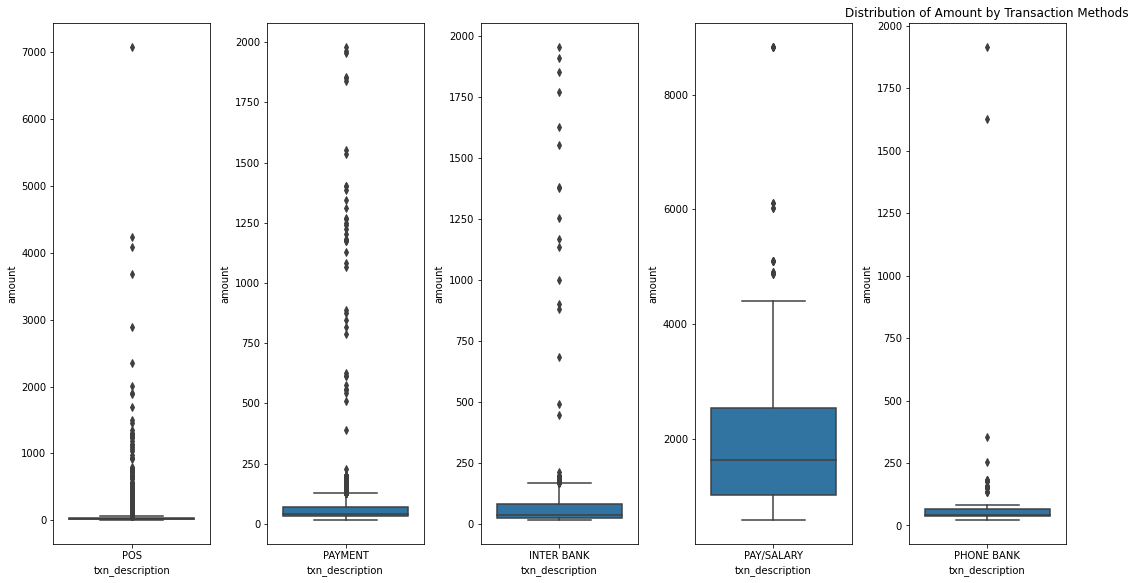

In [34]:
#visulisation by seaborn 
fig,axes=plt.subplots(1,5,figsize=(15,8))
sns.boxplot(y='amount', x= df[df['txn_description']=='POS']['txn_description'], data=df, ax=axes[0])
sns.boxplot(y="amount", x= df[df['txn_description']=='PAYMENT']['txn_description'], data=df, ax=axes[1])
sns.boxplot(y="amount", x= df[df['txn_description']=='INTER BANK']['txn_description'], data=df, ax=axes[2])
sns.boxplot(y="amount", x= df[df['txn_description']=='PAY/SALARY']['txn_description'], data=df, ax=axes[3])
sns.boxplot(y="amount", x= df[df['txn_description']=='PHONE BANK']['txn_description'], data=df, ax=axes[4])
plt.tight_layout()
plt.title('Distribution of Amount by Transaction Methods')

In [35]:
#Visulisation by plotly
trace0 = go.Box(
    y=df.loc[df['txn_description'] == 'POS']['amount'],
    name = 'POS',
    marker = dict( 
        color = 'rgb(242, 185, 196)',
    )
)

trace1 = go.Box(
    y=df.loc[df['txn_description'] == 'PAYMENT']['amount'],
    name = 'PAYMENT',
    marker = dict(
        color = 'rgb(206, 120, 179)',
    )
)
trace2 = go.Box(
    y=df.loc[df['txn_description'] == 'INTER BANK']['amount'],
    name = 'INTER BANK',
    marker = dict(
        color = 'rgb(173, 95, 173)',
    )
)
trace3 = go.Box(
    y=df.loc[df['txn_description'] == 'PAY/SALARY']['amount'],
    name = 'PAY/SALARY',
    marker = dict(
        color = 'rgb(131, 75, 160)',
    )
)
trace4 = go.Box(
    y=df.loc[df['txn_description'] == 'PHONE BANK']['amount'],
    name = 'PHONE BANK',
    marker = dict(
        color = 'rgb(87, 59, 136)',
    )
)



fig = make_subplots(rows=1, cols=5)

fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig.add_trace(trace2, 1, 3)
fig.add_trace(trace3, 1, 4)
fig.add_trace(trace4, 1, 5)


fig['layout'].update(height=400, width=800, title={
        'text': "Distribution of Amount by Transaction Methods",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [36]:
table= df[['txn_description','amount']].groupby('txn_description').describe(percentiles=np.arange(0.5,1,.05))
table
#the table below shows that those above 95% are outliers

amount                                                      \
                  count         mean          std    min      50%       55%   
txn_description                                                               
INTER BANK        742.0    86.699461   198.706044   16.0    39.00    41.100   
PAY/SALARY        883.0  1898.728029  1150.364621  576.0  1626.48  1711.390   
PAYMENT          2600.0    77.613077   152.310315   15.0    42.50    45.000   
PHONE BANK        101.0   106.099010   245.999695   21.0    43.00    58.000   
POS              7717.0    40.153732   149.833070    0.1    19.70    21.848   

                                                                          \
                      60%      65%      70%      75%       80%       85%   
txn_description                                                            
INTER BANK         44.000    55.00    59.00    83.00   108.600   127.000   
PAY/SALARY       1880.950  2101.51  2308.67  2538.68  2639.760  2887.340   
PAYMENT            48.000    50.00    58.00    70.00    92.200   128.150   
PHONE BANK         58.000    67.00    67.00    67.00   134.000   158.000   
POS                24.022    26.63    29.75    33.91    39.364    47.116   

                                              
                      90%       95%      max  
txn_description                               
INTER BANK        154.000   182.000  1956.00  
PAY/SALARY       3578.650  3977.460  8835.98  
PAYMENT           156.000   181.000  1981.00  
PHONE BANK        177.000   182.000  1916.00  
POS                61.152    99.764  7081.09

In [37]:
table1= df[['txn_description','amount']].groupby('txn_description').describe(percentiles=[.05])
table1
#the table below shows that, for POS, below 5% is outlier

amount                                                     \
                  count         mean          std    min       5%      50%   
txn_description                                                              
INTER BANK        742.0    86.699461   198.706044   16.0   18.100    39.00   
PAY/SALARY        883.0  1898.728029  1150.364621  576.0  725.320  1626.48   
PAYMENT          2600.0    77.613077   152.310315   15.0   20.000    42.50   
PHONE BANK        101.0   106.099010   245.999695   21.0   21.000    43.00   
POS              7717.0    40.153732   149.833070    0.1    6.128    19.70   

                          
                     max  
txn_description           
INTER BANK       1956.00  
PAY/SALARY       8835.98  
PAYMENT          1981.00  
PHONE BANK       1916.00  
POS              7081.09

It is better to replace these outliers with the median. 
It is problematic toreplace the extreme values with mean values as they are affected by outliers. 

In [38]:
df.loc[(df.txn_description == 'POS') & ((df.amount > 99.764)|(df.amount < 6.128)), 'amount'] = 19.70
df.loc[(df.txn_description == 'PAYMENT') & (df.amount > 181.0000), 'amount'] = 42.500
df.loc[(df.txn_description == 'INTER BANK') & (df.amount > 182.0000), 'amount'] = 39.000
df.loc[(df.txn_description == 'PAY/SALARY') & (df.amount > 3977.4600), 'amount'] = 1626.480
df.loc[(df.txn_description == 'PHONE BANK') & (df.amount > 182.0000), 'amount'] = 43.000

the statistics after replacing the outliers

In [39]:
table2= df[['txn_description','amount']].groupby('txn_description').describe()
table2

amount                                                     \
                  count         mean         std     min      25%      50%   
txn_description                                                              
INTER BANK        742.0    54.827493   42.142838   16.00    26.00    39.00   
PAY/SALARY        883.0  1732.575776  860.205777  576.00  1013.67  1626.48   
PAYMENT          2600.0    55.787115   40.391685   15.00    32.00    42.25   
PHONE BANK        101.0    66.653465   48.059221   21.00    36.00    43.00   
POS              7717.0    24.708440   16.939058    6.13    13.51    19.70   

                                   
                     75%      max  
txn_description                    
INTER BANK         59.00   182.00  
PAY/SALARY       2308.67  3977.46  
PAYMENT            59.00   181.00  
PHONE BANK         67.00   182.00  
POS                29.75    99.69

Distribution of amount by transaction method after outliers removed

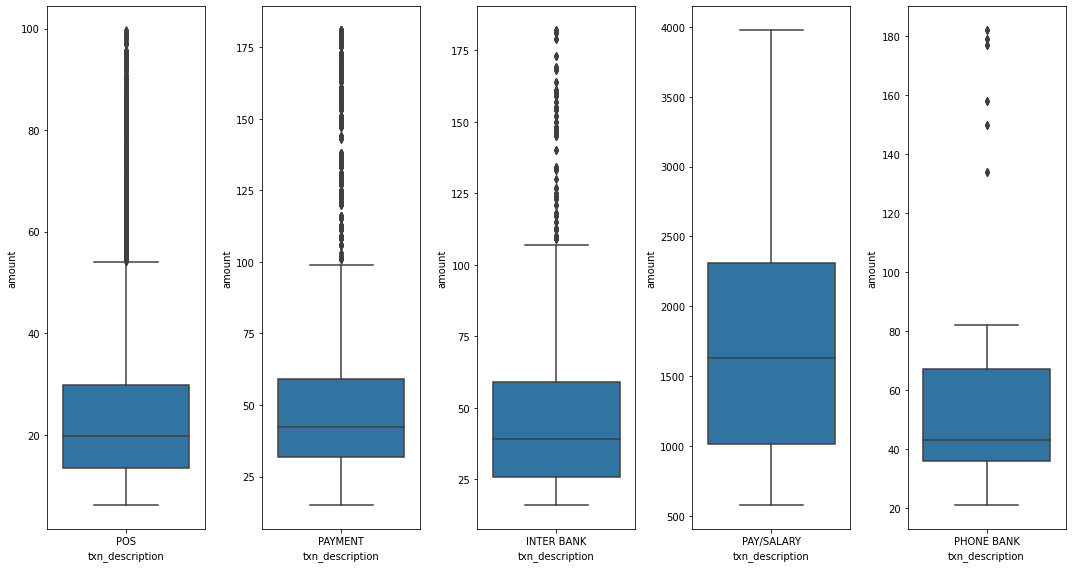

In [40]:
#Visulisation by seaborn
fig,axes=plt.subplots(1,5,figsize=(15,8))
sns.boxplot(y='amount', x= df[df['txn_description']=='POS']['txn_description'], data=df, ax=axes[0])
sns.boxplot(y="amount", x= df[df['txn_description']=='PAYMENT']['txn_description'], data=df, ax=axes[1])
sns.boxplot(y="amount", x= df[df['txn_description']=='INTER BANK']['txn_description'], data=df, ax=axes[2])
sns.boxplot(y="amount", x= df[df['txn_description']=='PAY/SALARY']['txn_description'], data=df, ax=axes[3])
sns.boxplot(y="amount", x= df[df['txn_description']=='PHONE BANK']['txn_description'], data=df, ax=axes[4])
plt.tight_layout()

In [41]:
trace0 = go.Box(
    y=df.loc[df['txn_description'] == 'POS']['amount'],
    name = 'POS',
    marker = dict( 
        color = 'rgb(242, 185, 196)',
    )
)

trace1 = go.Box(
    y=df.loc[df['txn_description'] == 'PAYMENT']['amount'],
    name = 'PAYMENT',
    marker = dict(
        color = 'rgb(206, 120, 179)',
    )
)
trace2 = go.Box(
    y=df.loc[df['txn_description'] == 'INTER BANK']['amount'],
    name = 'INTER BANK',
    marker = dict(
        color = 'rgb(173, 95, 173)',
    )
)
trace3 = go.Box(
    y=df.loc[df['txn_description'] == 'PAY/SALARY']['amount'],
    name = 'PAY/SALARY',
    marker = dict(
        color = 'rgb(131, 75, 160)',
    )
)
trace4 = go.Box(
    y=df.loc[df['txn_description'] == 'PHONE BANK']['amount'],
    name = 'PHONE BANK',
    marker = dict(
        color = 'rgb(87, 59, 136)',
    )
)



fig = make_subplots(rows=1, cols=5)

fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig.add_trace(trace2, 1, 3)
fig.add_trace(trace3, 1, 4)
fig.add_trace(trace4, 1, 5)

fig['layout'].update(height=400, width=800, title={
        'text': "Distribution of amount by transaction method after outliers replaced",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Distribution of Transaction Methods

In [42]:
df.pivot_table(index='txn_description', aggfunc='count')['transaction_id']

txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           7717
Name: transaction_id, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of txn_description')

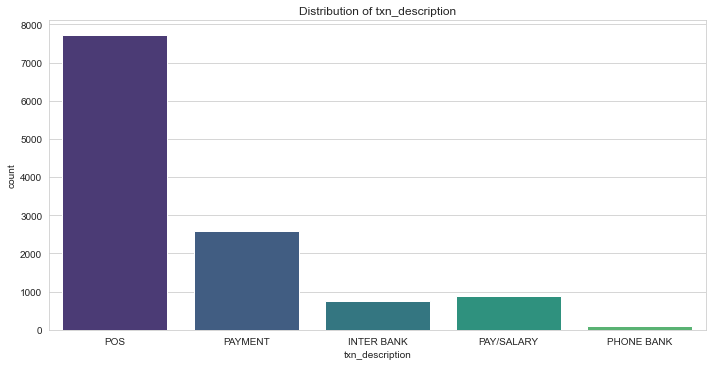

In [43]:
#visulisation method 1 - seaborn 
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.countplot(df.txn_description)
plt.tight_layout()
plt.title('Distribution of txn_description')

In [44]:
#Visulisation Method2 = plotly
df['txn_description'].iplot(
    kind='hist',
    bins=100,
    xTitle='Transaction Method',
    linecolor='black',
    yTitle='count',
    title='Distribution of Transaction Method')

In [45]:
 #POS is the most used method by customers. 
#Followed by POS is Payment. 
#The remaining methods have low usage rates, and Phone Banking is used the lowest. 

#### Distribution of Merchant State

Text(0.5, 1.0, 'Distribution of Merchant State')

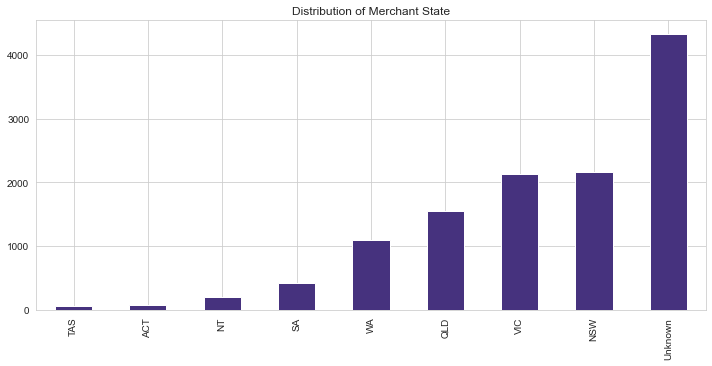

In [46]:
#visualisation method 1 - pandas built-in visualisation
sns.set_style('whitegrid')
sns.set_palette('viridis')
plt.figure(figsize=(10,5))
df2=df['merchant_state'].value_counts().sort_values()
df2.plot.bar()
plt.tight_layout()
plt.title('Distribution of Merchant State')

In [47]:
#Visulisation Method2 = plotly
df['merchant_state'].iplot(
    kind='hist',
    bins=100,
    xTitle='Merchant State',
    linecolor='black',
    yTitle='count',
    title='Distribution of Merchant State')

#### NSW and VIC are the two states where most merchants locate; QLD ranked third and WA ranked 4th .

#### Histogram of transaction amount

Filtering out purchase transactions only.//
Assuming purchase transactions must be associated with a merchant (have a merchant Id).

In [49]:
df1= df.dropna(subset=['merchant_id'])

In [50]:
df1.merchant_id.isnull().sum()

0

<AxesSubplot:>

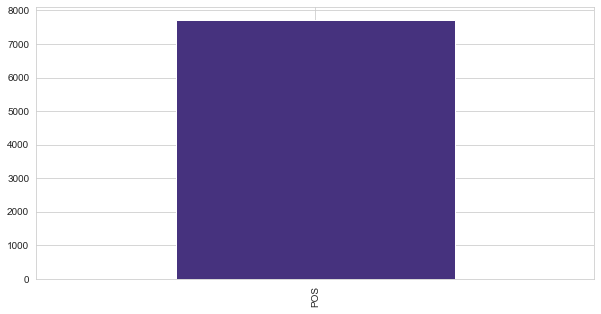

In [51]:
plt.figure(figsize=(10,5))
df2 = df1['txn_description'].value_counts().sort_values()
df2.plot.bar()

In [52]:
#We could find all transactions associated with a merchant was made by Pos sales

#### Histogram of purchase transaction amount

In [53]:
df1['amount'].iplot(
    kind='hist',
    bins=100,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Purchase Transaction Amount')

#### Histogram of overall transaction amount

In [54]:
df['amount'].iplot(
    kind='hist',
    bins=100,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Overall Transaction Amount')

In [55]:
df['month']=df['date'].apply(lambda x:x.month)

In [56]:
df['month'].value_counts()
# Customers make an average of 4014 transactions each month

10    4087
9     4013
8     3943
Name: month, dtype: int64

### 1.3 Segment the dataset by transaction date and time.

Average Spending by Month

In [57]:
df['month']=df['date'].apply(lambda x:x.month)
table3=df['amount'].groupby([df['txn_description'],df['month']]).mean()
df3 = table3.to_frame()
df3.reset_index(inplace=True)
df3

,txn_description,month,amount
0,INTER BANK,8,54.425000
1,INTER BANK,9,55.787500
2,INTER BANK,10,54.316794
3,PAY/SALARY,8,1747.787013
4,PAY/SALARY,9,1726.879816
5,PAY/SALARY,10,1723.043355
6,PAYMENT,8,55.295699
7,PAYMENT,9,55.993656
8,PAYMENT,10,56.046317
9,PHONE BANK,8,67.484848


Average volumn by month

In [58]:
table4=df.groupby([df['txn_description'],df['month']]).count()['transaction_id']
df4 = table4.to_frame()
df4.reset_index(inplace=True)
df4

,txn_description,month,transaction_id
0,INTER BANK,8,240
1,INTER BANK,9,240
2,INTER BANK,10,262
3,PAY/SALARY,8,298
4,PAY/SALARY,9,272
5,PAY/SALARY,10,313
6,PAYMENT,8,837
7,PAYMENT,9,867
8,PAYMENT,10,896
9,PHONE BANK,8,33


Regarding average volume, POS has the highest volume by month, ranging from 2500 to 2600 transactions. 
Followed by POS is PAYMENT, the volume of that ranges from 800 to 900 transactions. 
PAY / SALARY ranks third with around 300 transactions on average. 
Although POS has the largest number of transactions, its transaction amount is relatively low. 
On the other hand, PAY / SALARY has a small number of transactions which is only 1/10 of POS, but the amount of transactions is the highest. 
October is the highest trading month for every method, except POS where September is the highest trading month. 

Average Spending/Volume by Hour

Extract hour and get a new column called 'hour' from 'extraction' column

In [60]:
df['extraction']=pd.to_datetime(df['extraction'])
df['hour']=df['extraction'].apply(lambda x:x.hour)
df['hour'].head()
# more info abt processing time, date: https://blog.csdn.net/qq_22238533/article/details/77110626 

0    1
1    1
2    1
3    1
4    1
Name: hour, dtype: int64

Average Spending by Hour

In [61]:
table6=df['amount'].groupby([df['hour'],df['txn_description']]).mean()
df6=table6.to_frame()
df6.reset_index(inplace=True)
df6

,hour,txn_description,amount
0,0,POS,25.620185
1,1,POS,25.522196
2,2,INTER BANK,51.048780
3,2,PAYMENT,74.931507
4,2,PHONE BANK,134.000000
...,...,...,...
82,22,POS,25.598792
83,23,INTER BANK,67.130435
84,23,PAYMENT,56.887755
85,23,PHONE BANK,43.000000


In [62]:
df7=df[df['txn_description'] == 'POS']
table7=df7['amount'].groupby(df7['hour']).mean()
df7=table7.to_frame()
df7.reset_index(inplace=True)

In [63]:
df8=df[df['txn_description'] == 'SALES-POS']
table8=df8['amount'].groupby(df8['hour']).mean()
df8=table8.to_frame()
df8.reset_index(inplace=True)

In [64]:
df9=df[df['txn_description'] == 'PAYMENT']
table9=df9['amount'].groupby(df9['hour']).mean()
df9=table9.to_frame()
df9.reset_index(inplace=True)
df9

,hour,amount
0,2,74.931507
1,3,73.540541
2,4,48.203125
3,5,46.794479
4,6,54.992701
5,7,61.454545
6,8,68.642857
7,9,65.500000
8,10,51.459677
9,11,51.166667


In [65]:
df10=df[df['txn_description'] == 'INTER BANK']
table10=df10['amount'].groupby(df10['hour']).mean()
df10=table10.to_frame()
df10.reset_index(inplace=True)

In [66]:
df11=df[df['txn_description'] == 'PAY/SALARY']
table11=df11['amount'].groupby(df11['hour']).mean()
df11=table11.to_frame()
df11.reset_index(inplace=True)

In [67]:
df12=df[df['txn_description'] == 'PHONE BANK']
table12=df12['amount'].groupby(df12['hour']).mean()
df12=table12.to_frame()
df12.reset_index(inplace=True)

In [68]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='POS', x=df7['hour'], y=df7['amount']),
    go.Bar(name='SALES-POS', x=df8['hour'], y=df8['amount']),
    go.Bar(name='PAYMENT', x=df9['hour'], y=df9['amount']),
    go.Bar(name='INTER BANK', x=df10['hour'], y=df10['amount']),
    go.Bar(name='PAY/SALARY', x=df11['hour'], y=df11['amount']),
    go.Bar(name='PHONE BANK', x=df12['hour'], y=df12['amount']),
])
# Change the bar mode
fig.update_layout(barmode='stack',title={
        'text': "Average Spending Hourly",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Hour',yaxis_title='Average Spending')
fig.show()

Regarding average spending, PAY / SALARY has the highest average spend for all 3 months, while the time frame 11am-17pm has the highest average spending amount.
Clearly, the surge in the amount of money spent in this frame is due to employers paying employees. 

Average Volume by Hour

Text(0.5, 1.0, 'Average Volume by Hour')

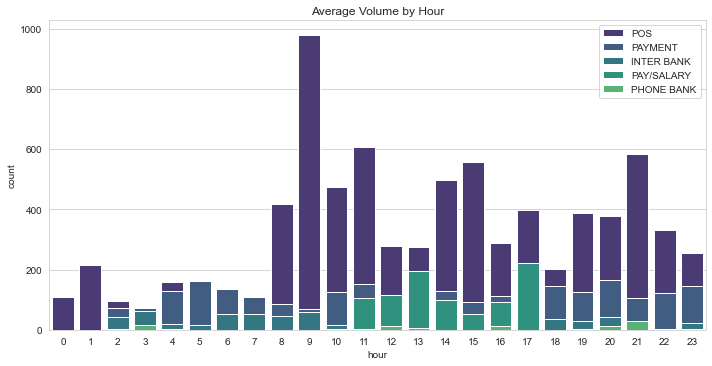

In [70]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.countplot(x=df.hour,hue = df['txn_description'],dodge=False)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Average Volume by Hour')

POS is used frequently, especially at 9 am, 11 am and 9 pm. 
The volume of POS makes these three periods stand out. 
17 pm is another distinct hour when there are higher volumes of PAY/SALARY and PAYMENT.

### 1.4 Exploring Location Information

#### Assuming purchase transactions must be associated with a merchant (have a merchant Id).
#We only include customers who use POS when they make payment at stores. 

#### 1.4.1 Melbourne

In [72]:
df13=df[df['merchant_suburb'] == 'Melbourne']
#Assuming purchase transactions must be associated with a merchant (have a merchant Id).
#We only include customers who use POS when they make payment at stores. 
df13= df13.dropna(subset=['merchant_id'])

In [73]:
df13['c_m_lng']=df13['long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df13['c_m_lat']=df13['long_lat'].apply(str).apply(lambda x:x.split(' ')[-1])
df13['m_m_lng']=df13['merchant_long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df13['m_m_lat']=df13['merchant_long_lat'].apply(str).apply(lambda y:y.split(' ')[-1])
df13['c_m_lng']= df13['c_m_lng'].apply(lambda x:float(x))
df13['c_m_lat']= df13['c_m_lat'].apply(lambda x:float(x))
df13['m_m_lng']= df13['m_m_lng'].apply(lambda x:float(x))
df13['m_m_lat']= df13['m_m_lat'].apply(lambda x:float(x))

In [74]:
print(df13['c_m_lng'].head());print(df13['c_m_lat'].head());print(df13['m_m_lng'].head());print(df13['m_m_lat'].head())

7      144.95
74     145.45
146    149.83
169    151.04
216    144.96
Name: c_m_lng, dtype: float64
7     -37.76
74    -37.74
146   -29.47
169   -33.80
216   -37.76
Name: c_m_lat, dtype: float64
7      144.96
74     144.96
146    144.96
169    144.96
216    144.98
Name: m_m_lng, dtype: float64
7     -37.81
74    -37.81
146   -37.82
169   -37.82
216   -37.83
Name: m_m_lat, dtype: float64


In [75]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [76]:
# Get customer location coordinates from customer latitude and longitude
cmx, cmy = lat_lng_to_pixels(df13.c_m_lat,df13.c_m_lng)
print(cmy.head())
print(min(cmy));print(max(cmy));print(min(cmx));print(max(cmx))

7     -61.342671
74    -61.335644
146   -58.572931
169   -59.986218
216   -61.342671
Name: c_m_lat, dtype: float64
-63.20953766496416
-53.4631202260209
81.83888888888889
120.83333333333333


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning:

invalid value encountered in log



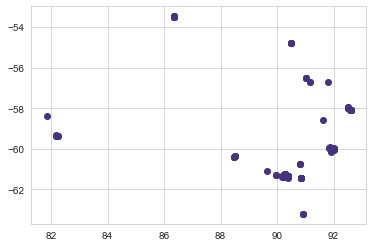

In [77]:
plt.scatter(cmx, cmy)

In [78]:
# Display a scatter plot for merchant locations in melbourne
mmx, mmy = lat_lng_to_pixels(df13['m_m_lat'], df13['m_m_lng'])
mmy.head()

7     -61.360244
74    -61.360244
146   -61.363761
169   -61.363761
216   -61.367277
Name: m_m_lat, dtype: float64

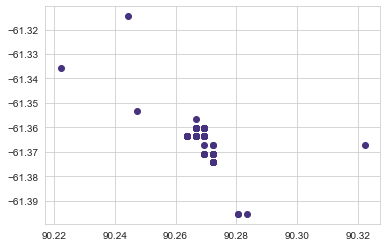

In [79]:
plt.scatter(mmx, mmy)

(81.30013888888888, 93.1526388888889, -63.69685853691132, -52.975799354073736)

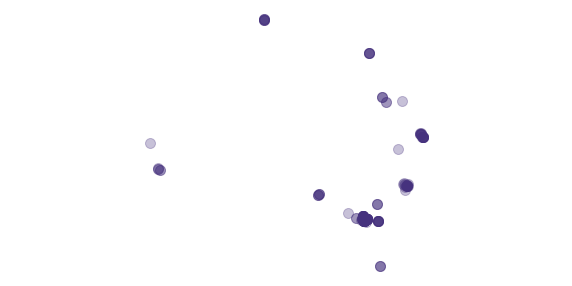

In [80]:
# density of ANZ POS Users in Mel
plt.figure(figsize=(10, 5))
plt.scatter(cmx,cmy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [81]:
import plotly.graph_objects as go
fig1 = go.Figure(go.Densitymapbox(lat=df13.c_m_lat, lon=df13.c_m_lng,
                                 radius=10))
fig1.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.update_layout(title={
        'text': "Density of ANZ POS Users for stores in Melbourne",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig1.show()

(90.21722222222223, 90.3272222222222, -61.39947041213381, -61.310534539996596)

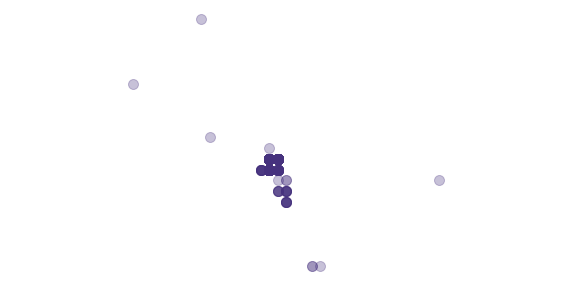

In [82]:
# density of stores in melbourne
# Specify the figure size
plt.figure(figsize=(10, 5))
plt.scatter(mmx, mmy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [83]:
fig2 = go.Figure(go.Densitymapbox(lat=df13.m_m_lat, lon=df13.m_m_lng,
                                 radius=10))
fig2.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.update_layout(title={
        'text': "Density of Stores in Melbourne",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.show()

Conclusion 1: For stores in Melbourne, their customers are from different parts in Australia(mainly Melbourne,Sydney, Brisbane,Perth,Adelaide) and some even from New Zealand. This may be because Melbourne is one of the biggest popular cities in Australia, and the stores there may sell a variety of merchandise which stores in other places do not provide. Additionaly, in Melbourne, the locations of stores are concentrated in the CBD and neighbouring high-income areas. The density of ANZ customers using POS in Melbourne is quite high, as shown by the bold colour of the contour plots in fig1, these customers live in 3 places adjacent to the CBD and St Kilda. 

#### 1.4.2 Sydney

In [84]:
df14=df[df['merchant_suburb'] == 'Sydney']
df14= df14.dropna(subset=['merchant_id'])

In [85]:
df14['c_s_lng']=df14['long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df14['c_s_lat']=df14['long_lat'].apply(str).apply(lambda x:x.split(' ')[-1])
df14['m_s_lng']=df14['merchant_long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df14['m_s_lat']=df14['merchant_long_lat'].apply(str).apply(lambda y:y.split(' ')[-1])
df14['c_s_lng']= df14.c_s_lng.apply(lambda x:float(x))
df14['c_s_lat']= df14.c_s_lat.apply(lambda x:float(x))
df14['m_s_lng']= df14.m_s_lng.apply(lambda x:float(x))
df14['m_s_lat']= df14.m_s_lat.apply(lambda x:float(x))

In [86]:
print(df14['c_s_lng'].head());print(df14['c_s_lat'].head());print(df14['m_s_lng'].head());print(df14['m_s_lat'].head())

1      153.41
2      151.23
47     255.00
58     145.45
230    145.04
Name: c_s_lng, dtype: float64
1      -27.95
2      -33.94
47    -573.00
58     -37.74
230    -37.85
Name: c_s_lat, dtype: float64
1      151.21
2      151.21
47     151.21
58     151.21
230    151.21
Name: m_s_lng, dtype: float64
1     -33.87
2     -33.87
47    -33.87
58    -33.87
230   -33.87
Name: m_s_lat, dtype: float64


In [87]:
csx, csy = lat_lng_to_pixels(df14['c_s_lat'], df14['c_s_lng'])
print(csy.head())

1     -58.091504
2     -60.033055
47           NaN
58    -61.335644
230   -61.374312
Name: c_s_lat, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning:

invalid value encountered in log



In [88]:
msx, msy = lat_lng_to_pixels(df14['m_s_lat'], df14['m_s_lng'])
msy.head()

1     -60.009627
2     -60.009627
47    -60.009627
58    -60.009627
230   -60.009627
Name: m_s_lat, dtype: float64

(81.30013888888888, 93.1526388888889, -61.81423293328077, -53.065448192341854)

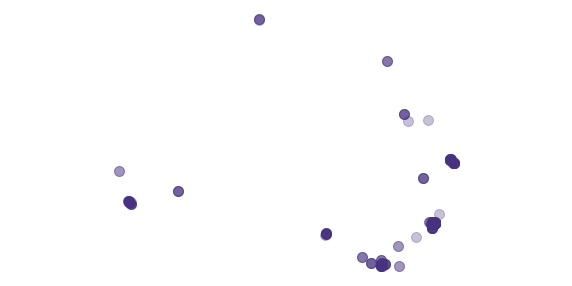

In [89]:
# density of ANZ POS Users in Syd
plt.figure(figsize=(10, 5))
plt.scatter(csx, csy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [90]:
fig3 = go.Figure(go.Densitymapbox(lat=df14.c_s_lat, lon=df14.c_s_lng,
                                 radius=10))
fig3.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig3.update_layout(title={
        'text': "Density of ANZ POS Users for stores in Sydney",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.show()

(91.90055555555556, 92.01055555555556, -60.03606491567989, -59.9698395941916)

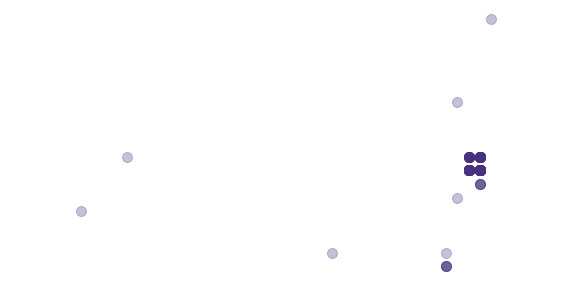

In [91]:
# density of stores in Syd
# Specify the figure size
plt.figure(figsize=(10, 5))
plt.scatter(msx, msy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [92]:
fig4 = go.Figure(go.Densitymapbox(lat=df14.m_s_lat, lon=df14.m_s_lng,
                                 radius=10))
fig4.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig4.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig4.update_layout(title={
        'text': "Density of stores in Sydney",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig4.show()

Conclusion 2: For stores in Sydney, their customers are also from different parts in Australia(mainly Sydney, Brisbane,Melbourne, Perth, Adelaide). Likewise, this may be because Sydney is one of the top 3 city in Australia. Additionaly,in Sydney, stores also cluster in the center of city, and ANZ POS Users focus on living near the ocean, south of the stores.

#### 1.4.3 Brisbane

In [93]:
df15=df[df['merchant_suburb'] == 'Brisbane City']
df15= df15.dropna(subset=['merchant_id'])

In [94]:
df15['c_b_lng']=df15['long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df15['c_b_lat']=df15['long_lat'].apply(str).apply(lambda x:x.split(' ')[-1])
df15['m_b_lng']=df15['merchant_long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df15['m_b_lat']=df15['merchant_long_lat'].apply(str).apply(lambda y:y.split(' ')[-1])
df15['c_b_lng']= df15.c_b_lng.apply(lambda x:float(x))
df15['c_b_lat']= df15.c_b_lat.apply(lambda x:float(x))
df15['m_b_lng']= df15.m_b_lng.apply(lambda x:float(x))
df15['m_b_lat']= df15.m_b_lat.apply(lambda x:float(x))

In [95]:
print(df15['c_b_lng'].head());print(df15['c_b_lat'].head());print(df15['m_b_lng'].head());print(df15['m_b_lat'].head())

490     153.10
803     145.00
1323    153.05
1416    153.09
1489    145.13
Name: c_b_lng, dtype: float64
490    -27.66
803    -37.83
1323   -27.61
1416   -27.48
1489   -37.70
Name: c_b_lat, dtype: float64
490     153.02
803     153.02
1323    153.03
1416    153.03
1489    153.02
Name: m_b_lng, dtype: float64
490    -27.47
803    -27.47
1323   -27.47
1416   -27.47
1489   -27.46
Name: m_b_lat, dtype: float64


In [96]:
cbx, cby = lat_lng_to_pixels(df15['c_b_lat'], df15['c_b_lng'])
print(cby.head())

490    -58.000433
803    -61.367277
1323   -57.984756
1416   -57.944028
1489   -61.321598
Name: c_b_lat, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning:

invalid value encountered in log



In [97]:
mbx, mby = lat_lng_to_pixels(df15['m_b_lat'], df15['m_b_lng'])
mby.head()

490    -57.940897
803    -57.940897
1323   -57.940897
1416   -57.940897
1489   -57.937766
Name: m_b_lat, dtype: float64

(83.30097222222221, 93.05736111111112, -61.81423293328077, -53.065448192341854)

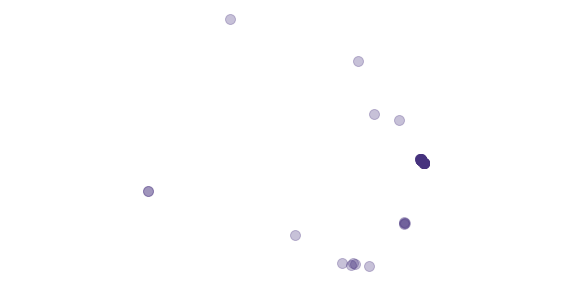

In [98]:
# density of ANZ POS Users in Brisbane
plt.figure(figsize=(10, 5))
plt.scatter(cbx, cby, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [99]:
fig5 = go.Figure(go.Densitymapbox(lat=df15.c_b_lat, lon=df15.c_b_lng,
                                 radius=10))
fig5.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig5.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig5.update_layout(title={
        'text': "Density of ANZ POS Users for stores in Brisbane",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig5.show()

(92.50541666666668, 92.50847222222222, -57.94434088457811, -57.93745320460105)

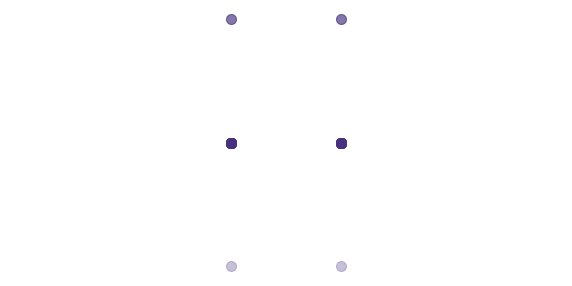

In [100]:
# density of stores in Brisbane
# Specify the figure size
plt.figure(figsize=(10, 5))
plt.scatter(mbx, mby, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [101]:
fig6 = go.Figure(go.Densitymapbox(lat=df15.m_b_lat, lon=df15.m_b_lng,
                                 radius=10))
fig6.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig6.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig6.update_layout(title={
        'text': "Density of stores in Brisbane",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig6.show()

Conclusion3: Firstly, for stores in Brisbane, their customers are mainly from the city and the surrounding tourist city, Gold Coast. Customers in Brisbane divide into 3 groups, and only one group lives near the store’s location. Additionaly, there is a greater concentration of shops in Brisbane, mainly in two areas in the city.

#### 1.4.4 Perth

In [102]:
df16=df[df['merchant_suburb'] == 'Perth']
df16= df16.dropna(subset=['merchant_id'])

In [103]:
df16['c_p_lng']=df16['long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df16['c_p_lat']=df16['long_lat'].apply(str).apply(lambda x:x.split(' ')[-1])
df16['m_p_lng']=df16['merchant_long_lat'].apply(str).apply(lambda x:x.split(' ')[0])
df16['m_p_lat']=df16['merchant_long_lat'].apply(str).apply(lambda y:y.split(' ')[-1])
df16['c_p_lng']= df16.c_p_lng.apply(lambda x:float(x))
df16['c_p_lat']= df16.c_p_lat.apply(lambda x:float(x))
df16['m_p_lng']= df16.m_p_lng.apply(lambda x:float(x))
df16['m_p_lat']= df16.m_p_lat.apply(lambda x:float(x))

In [104]:
print(df16['c_p_lng'].head());print(df16['c_p_lat'].head());print(df16['m_p_lng'].head());print(df16['m_p_lat'].head())

178     115.90
584     116.06
678     115.90
1098    115.98
1260    115.74
Name: c_p_lng, dtype: float64
178    -31.92
584    -32.00
678    -31.92
1098   -32.07
1260   -31.72
Name: c_p_lat, dtype: float64
178     115.86
584     115.93
678     115.86
1098    115.93
1260    115.85
Name: m_p_lng, dtype: float64
178    -31.95
584    -31.96
678    -31.95
1098   -31.96
1260   -31.95
Name: m_p_lat, dtype: float64


In [105]:
cpx, cpy = lat_lng_to_pixels(df16['c_p_lat'], df16['c_p_lng'])
print(cpy.head())

178    -59.364473
584    -59.390665
678    -59.364473
1098   -59.413602
1260   -59.299091
Name: c_p_lat, dtype: float64


In [106]:
mpx, mpy = lat_lng_to_pixels(df16['m_p_lat'], df16['m_p_lng'])
mpy.head()

178    -59.374292
584    -59.377566
678    -59.374292
1098   -59.377566
1260   -59.374292
Name: m_p_lat, dtype: float64

(81.36097222222222, 91.8751388888889, -61.366662873081765, -58.21667831006972)

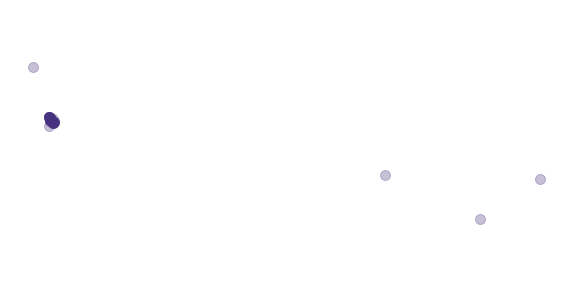

In [107]:
# density of ANZ POS Users in Perth
plt.figure(figsize=(10, 5))
plt.scatter(cpx, cpy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [108]:
import plotly.graph_objects as go
fig7 = go.Figure(go.Densitymapbox(lat=df16.c_p_lat, lon=df16.c_p_lng,
                                 radius=10))
fig7.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig7.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig7.update_layout(title={
        'text': "Density of ANZ POS Users for stores in Perth",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig7.show()

(82.15569444444444, 82.27486111111111, -59.38640547897949, -59.33601222592842)

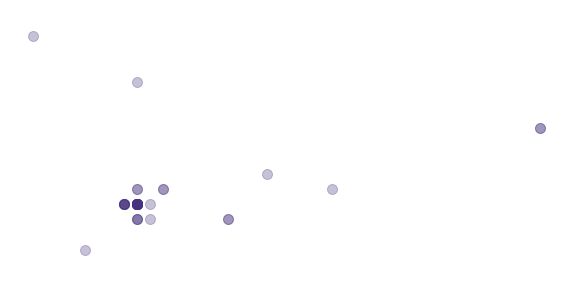

In [109]:
# density of stores in Perth
# Specify the figure size
plt.figure(figsize=(10, 5))
plt.scatter(mpx, mpy, s=100, alpha=0.3)
plt.axis('equal')
# remove the axes
plt.axis('off')

In [110]:
fig8 = go.Figure(go.Densitymapbox(lat=df16.m_p_lat, lon=df16.m_p_lng,
                                 radius=10))
fig8.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig8.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig8.update_layout(title={
        'text': "Density of stores in Perth",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig8.show()

Conclusions4: For stores in Perth, their customers are scattered, but all around Perth. Customers divide into two groups who live at the edge of the shopping area. This may be because Perth is the only big city in western Australia, and only Perth provides a variety of products. Also, Western population density is small, everybody lives very dispersive

## TASK 1 DONE